In [1]:
from pyabc import History
import pandas as pd
from ionchannelABC.utils import weighted_cv
from pyabc.weighted_statistics import weighted_mean, weighted_median
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

INFO:myokit:Loading Myokit version 1.28.3
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:290: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:306: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:290: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:306: SyntaxWarning: assertion is always true, perhaps remove parentheses?


### Load history files

In [2]:
h_nyg_reported = History('sqlite:///'+
                         '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/nygren/ina/reported/nygren_ina_reported.db')

In [3]:
h_nyg = History('sqlite:///'+
                '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/nygren/ina/full/nygren_ina_full2.db')

In [4]:
h_cou_m = History('sqlite:///'+
                  '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/ina/reported/courtemanche_mgate_reported.db')
h_cou_h = History('sqlite:///'+
                  '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/ina/reported/courtemanche_hgate_reported.db')
h_cou_j = History('sqlite:///'+
                  '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/ina/reported/courtemanche_jgate_reported.db')

In [5]:
h_sta = History('sqlite:///'+
                '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/standardised/ina/standardised_ina_full.db')

## Load databases and weightings

In [6]:
df_nyg_reported, w_nyg_reported = h_nyg_reported.get_distribution(m=0)

In [7]:
df_nyg, w_nyg = h_nyg.get_distribution(m=0)

### COU

In [8]:
df_cou_m, w_cou_m = h_cou_m.get_distribution(m=0)

In [9]:
df_cou_h, w_cou_h = h_cou_h.get_distribution(m=0)

In [10]:
df_cou_j, w_cou_j = h_cou_j.get_distribution(m=0)

### STA

In [11]:
df_sta, w_sta = h_sta.get_distribution(m=0)

## Compare number of parameters

In [12]:
data = [['N',6,9],['C',6,25],['S',4,5]]

In [13]:
df = pd.DataFrame(data, columns = ['model', 'act', 'inact'])

In [14]:
df.inact = df.act+df.inact

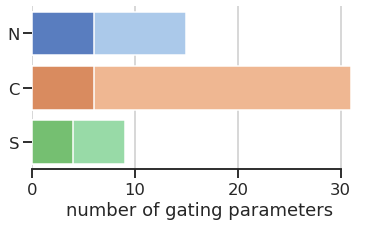

In [73]:
sns.set(style="ticks")
sns.set_context('talk')
sns.set_color_codes("pastel")

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="inact", y="model", hue="model", data=df,
            palette="pastel", dodge=False)
            #label="inact", color="b")

sns.set_color_codes("muted")
sns.barplot(x="act", y="model", hue="model", data=df,
            palette="muted", dodge=False)
            #label="act", color="r")

handles, labels = ax.get_legend_handles_labels()
order = []
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          ncol=2, loc="lower right", frameon=False)
ax.set(xlabel="number of gating parameters")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [74]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/param_num_compare.pdf')

### Compare original and full datasets

In [22]:
cv_nyg_reported = weighted_cv(df_nyg_reported, w_nyg_reported, sample_size=len(df_nyg_reported))

model = ['N',]*len(cv_nyg_reported)
data = ['ORIGINAL',]*len(cv_nyg_reported)
frame = {'model': model, 'data': data, 'CV': cv_nyg_reported}

nyg_reported = pd.DataFrame(frame)

In [23]:
cv_nyg = weighted_cv(df_nyg, w_nyg, sample_size=len(df_nyg))
model = ['N',]*len(cv_nyg)
data = ['COMPLETE',]*len(cv_nyg)
frame = {'model': model, 'data': data, 'CV': cv_nyg}
nyg = pd.DataFrame(frame)

In [ ]:
old_vs_new = pd.concat([nyg_reported, nyg])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

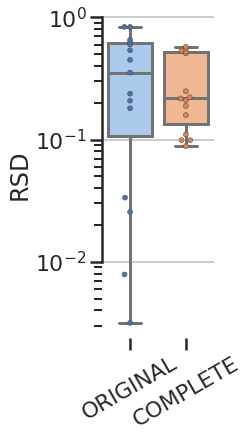

In [18]:
sns.set(style="ticks")
sns.set_context('poster')
sns.set_color_codes('pastel')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

# Initialize the figure
f, ax = plt.subplots(figsize=(2, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='data', y='CV', data=old_vs_new,
              palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='data', y='CV', data=old_vs_new,
              dodge=True, linewidth=0.5
            )

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set_yscale('log')
ax.set(ylabel="RSD")
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = old_vs_new['CV'].max() + 0.02, 0.02, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p = 0.26", ha='center', va='bottom', color=col)

plt.xticks(rotation=30)

In [19]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/nyg_add_data.pdf')

In [20]:
diff = nyg.CV-nyg_reported.CV
ss.wilcoxon(diff)

WilcoxonResult(statistic=40.0, pvalue=0.25598851167013814)

In [24]:
nyg_pars_reported = df_nyg_reported.sample(n=100, weights=w_nyg_reported, replace=True)
nyg_pars_reported = nyg_pars_reported.set_index([pd.Index(range(100))])
nyg_pars_reported = nyg_pars_reported.to_dict(orient='records')

In [25]:
nyg_pars = df_nyg.sample(n=100, weights=w_nyg, replace=True)
nyg_pars = nyg_pars.set_index([pd.Index(range(100))])
nyg_pars = nyg_pars.to_dict(orient='records')

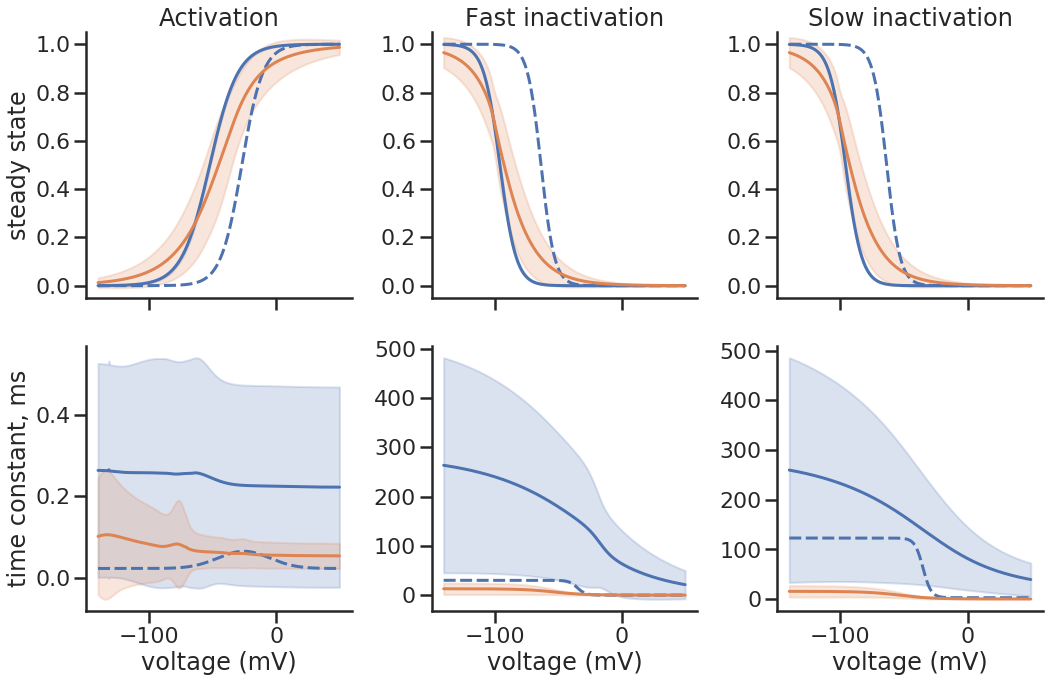

In [146]:
from ionchannelABC.visualization import plot_variables
sns.set_context('poster')
sns.set_palette('deep')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

v = np.arange(-140, 50, 0.5)

nyg_vars = {'mi': 'ina.m_ss',
            'hi': 'ina.h_ss',
            'ji': 'ina.h_ss',
            'mt': 'ina.tau_m',
            'ht': 'ina.tau_h1',
            'jt': 'ina.tau_h2'}

f, ax = plot_variables(v, [nyg_vars, nyg_vars], 
                       ['models/nygren_ina.mmt', 'models/nygren_ina_full.mmt'], 
                       [nyg_pars_reported, nyg_pars],
                       original=[True,False],
                       figshape=(3,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Fast inactivation')
ax[0][2].set_title('Slow inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))

ax[1][0].set_ylabel('time constant, ms')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [147]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/nyg_add_data_gates.pdf')

In [26]:
cv_cou_m = weighted_cv(df_cou_m, w_cou_m, sample_size=len(df_cou_m))
cv_cou_h = weighted_cv(df_cou_h, w_cou_h, sample_size=len(df_cou_h))
cv_cou_j = weighted_cv(df_cou_j, w_cou_j, sample_size=len(df_cou_j))

cv_cou = pd.concat([cv_cou_m, cv_cou_h, cv_cou_j])
model = ['C',]*len(cv_cou)
data = ['ORIGINAL',]*len(cv_cou)
frame = {'model': model, 'data': data, 'CV': cv_cou}
cou = pd.DataFrame(frame)

In [27]:
df_reported = pd.concat([nyg_reported, cou])

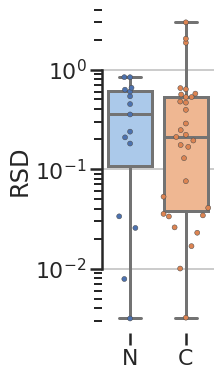

In [155]:
sns.set(style="ticks")
sns.set_context('poster')

# Initialize the figure
f, ax = plt.subplots(figsize=(2, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='model', y='CV', data=df_reported,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='model', y='CV', data=df_reported,
              linewidth=0.5)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="RSD")
ax.set_yscale('log')
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = df_reported['CV'].max() + 0.1, 0.1, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p = 0.29", ha='center', va='bottom', color=col)

In [156]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/cv_original.pdf')

In [152]:
ss.mannwhitneyu(df_reported[df_reported.model=='N'].CV, df_reported[df_reported.model=='C'].CV)

MannwhitneyuResult(statistic=209.0, pvalue=0.294962999425457)

## Standardised model

In [28]:
cv_sta = weighted_cv(df_sta, w_sta, sample_size=len(df_sta))

In [29]:
model = ['S',]*len(cv_sta)
frame = {'model': model, 'CV': cv_sta}
sta = pd.DataFrame(frame)

In [30]:
df = pd.concat([nyg, cou, sta])

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


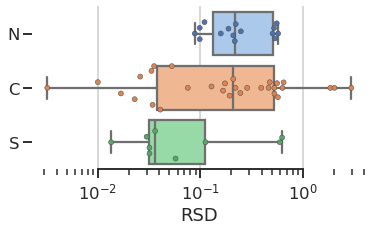

In [39]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 3))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='CV', y='model', data=df,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='CV', y='model', data=df,
              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="RSD")
ax.set_xscale('log')
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [40]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/compare_cv_full.pdf')

In [94]:
ss.mannwhitneyu(df[df.model=='N'].CV, df[df.model=='S'].CV)

MannwhitneyuResult(statistic=34.0, pvalue=0.024548990804632777)

In [95]:
ss.mannwhitneyu(df[df.model=='C'].CV, df[df.model=='S'].CV)

MannwhitneyuResult(statistic=98.0, pvalue=0.09209795590259495)

In [96]:
ss.mannwhitneyu(df[df.model=='N'].CV, df[df.model=='C'].CV)

MannwhitneyuResult(statistic=210.0, pvalue=0.30309800832203143)

In [410]:
#f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/compare_cv_full.pdf')

### Plot epsilon comparison

In [84]:
eps_cou_m = h_cou_m.get_weighted_distances()
eps_cou_h = h_cou_h.get_weighted_distances()
eps_cou_j = h_cou_j.get_weighted_distances()

In [85]:
# Create virtual COU epsilon dataset by summing
eps_cou = np.array([])
eps_cou = (np.array(eps_cou_m.sample(n=100,axis=0,weights=eps_cou_m.w,replace=True).distance) +
           np.array(eps_cou_h.sample(n=100,axis=0,weights=eps_cou_h.w,replace=True).distance) +
           np.array(eps_cou_j.sample(n=100,axis=0,weights=eps_cou_j.w,replace=True).distance))

In [86]:
frame = {'model': 'C', 'eps': eps_cou, 'exp': 'all'}
eps_cou = pd.DataFrame(frame)

In [87]:
eps_nyg = h_nyg.get_weighted_distances()

In [88]:
eps_nyg = eps_nyg.sample(n=100,axis=0,weights=eps_nyg.w,replace=True).distance
eps_nyg = pd.DataFrame({'model': 'N', 'eps': eps_nyg, 'exp': 'all'})

In [89]:
eps_sta = h_sta.get_weighted_distances()

In [90]:
eps_sta = eps_sta.sample(n=100,axis=0,weights=eps_sta.w,replace=True).distance
eps_sta = pd.DataFrame({'model': 'S', 'eps': eps_sta, 'exp': 'all'})

In [91]:
eps = pd.concat([eps_nyg,eps_cou,eps_sta])

In [92]:
eps['normalised'] = (eps['eps']-eps['eps'].min())/(eps['eps'].max()-eps['eps'].min())

Text(0, 0.5, 'normalised residual')

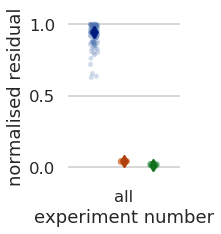

In [111]:
sns.set_context('talk')
sns.set_style('whitegrid')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(2, 3))
sns.despine(bottom=True, left=True)

sns.stripplot(x='exp', y='normalised', hue='model', data=eps, 
              dodge=True, jitter=True, alpha=.25, zorder=1,
              palette='deep', ax=ax)

sns.pointplot(x="exp", y="normalised", hue="model",
              data=eps,
              estimator=np.median,
              dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

ax.get_legend().remove()
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[3:], labels[3:], title="model",
#          handletextpad=0, columnspacing=1,
#          loc="best", ncol=3, frameon=True)
ax.set_xlabel('experiment number')
ax.set_ylabel('normalised residual')

In [112]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/eps_stripplot.pdf')

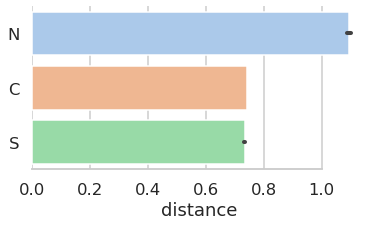

In [109]:
sns.set_context('talk')

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="eps", y="model", data=eps, palette='pastel')

ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="distance")
sns.despine(trim=True, left=True)

In [110]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/eps_compare.pdf')

## Plot simulation outputs

In [31]:
from ionchannelABC.visualization import plot_sim_results

In [32]:
from experiments.ina_sakakibara import (sakakibara_act,
                                        sakakibara_inact,
                                        sakakibara_inact_kin_fast,
                                        sakakibara_inact_kin_slow,
                                        sakakibara_rec_fast,
                                        sakakibara_rec_slow)
from experiments.ina_schneider import (schneider_taum)

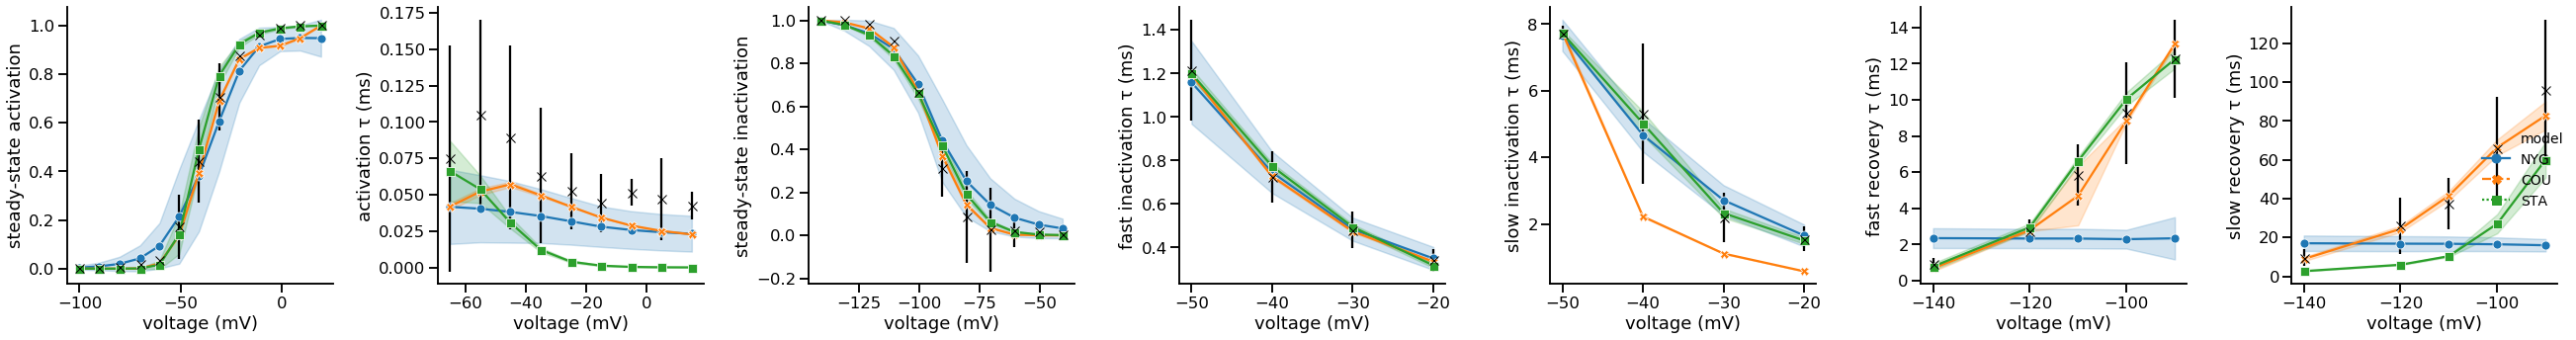

In [16]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_sim_results(['models/nygren_ina.mmt',
                      'models/courtemanche_ina.mmt',
                      'models/courtemanche_ina.mmt',
                      'models/courtemanche_ina.mmt',
                      'models/standardised_ina.mmt'],
                     sakakibara_act,
                     schneider_taum,
                     sakakibara_inact,
                     sakakibara_inact_kin_fast,
                     sakakibara_inact_kin_slow,
                     sakakibara_rec_fast,
                     sakakibara_rec_slow,
                     temp_match_model=4, # scale to temperature of S model
                     masks=[None,
                            [0,1]+[None,]*5,
                            [None,]*2+[2,3,None,5,None],
                            [None,]*4+[4,None,6],
                            None],
                     df=[df_nyg,
                         df_cou_m,
                         df_cou_h,
                         df_cou_j,
                         df_sta], 
                     w=[w_nyg,
                        w_cou_m,
                        w_cou_h,
                        w_cou_j,
                        w_sta])

#xlabels = ["voltage (mV)"]*7
ylabels = ["steady-state activation", "activation τ (ms)", "steady-state inactivation",
           "fast inactivation τ (ms)", "slow inactivation τ (ms)", "fast recovery τ (ms)", 
           "slow recovery τ (ms)"]
#titles = ["Steady-state activation", "Activation time constant", "Steady-state inactivation",
#          "Inactivation time constant", "Inactivation time constant",
#          "Recovery time constant", "Recovery time constant"]
for ax in g.axes.flatten():
    ax.set_xlabel("voltage (mV)")
for ax, yl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title("")

plt.tight_layout()

In [17]:
g.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/compare_out.pdf')

### Compare SS and tau values

In [12]:
import myokit
nyg = 'models/nygren_ina_adj.mmt'
cou ='models/courtemanche_ina.mmt'
std = 'models/standardised_ina.mmt'

In [13]:
v = np.arange(-140, 50, 0.5)

In [14]:
cou_vars = {'mi': 'ina.m_inf',
            'hi': 'ina.h_inf',
            'ji': 'ina.j_inf',
            'mt': 'ina.tau_m',
            'ht': 'ina.tau_h',
            'jt': 'ina.tau_j'}

In [15]:
nyg_vars = {'mi': 'ina.m_ss',
            'hi': 'ina.h_ss',
            'ji': 'ina.h_ss',
            'mt': 'ina.tau_m',
            'ht': 'ina.tau_h1',
            'jt': 'ina.tau_h2'}

In [16]:
from ionchannelABC.visualization import plot_variables

In [17]:
nyg_pars_reported = df_nyg_reported.sample(n=100, weights=w_nyg_reported, replace=True)
nyg_pars_reported = nyg_pars_reported.set_index([pd.Index(range(100))])
nyg_pars_reported = nyg_pars_reported.to_dict(orient='records')

In [18]:
cou_pars_m = df_cou_m.sample(n=100, weights=w_cou_m, replace=True)
cou_pars_m = cou_pars_m.set_index([pd.Index(range(100))])
cou_pars_h = df_cou_h.sample(n=100, weights=w_cou_h, replace=True)
cou_pars_h = cou_pars_h.set_index([pd.Index(range(100))])
cou_pars_j = df_cou_j.sample(n=100, weights=w_cou_j, replace=True)
cou_pars_j = cou_pars_j.set_index([pd.Index(range(100))])
cou_pars = pd.concat([cou_pars_m,cou_pars_h,cou_pars_j],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


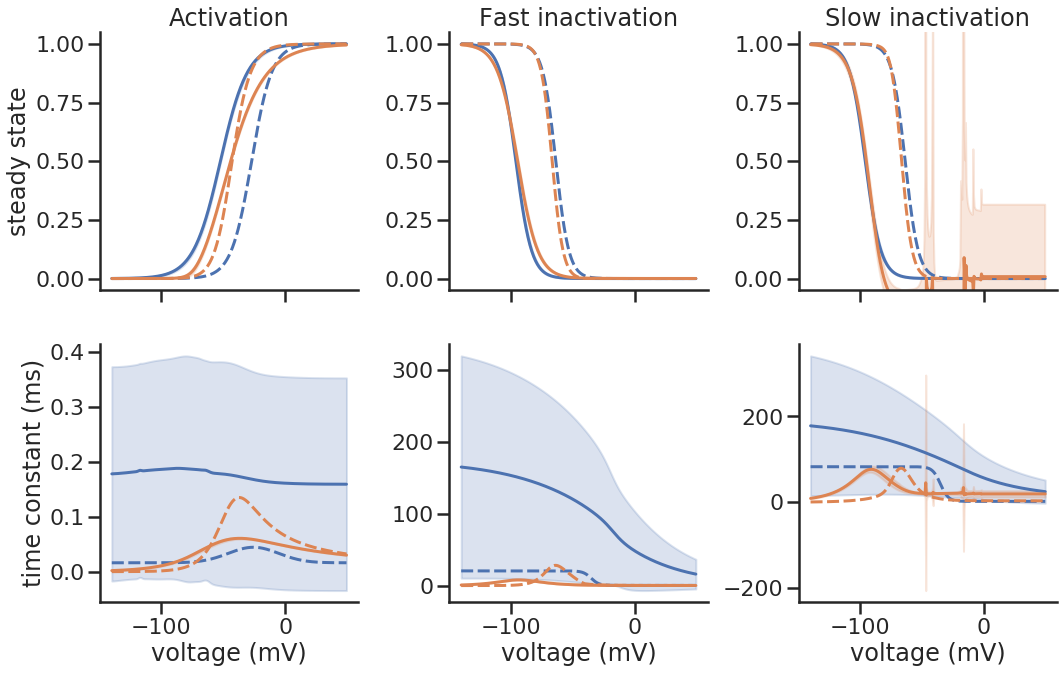

In [91]:
sns.set_context('poster')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, 
                       [nyg_vars, cou_vars], 
                       [nyg, cou], 
                       [nyg_pars_reported, cou_pars],
                       original=True,
                       figshape=(3,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Fast inactivation')
ax[0][2].set_title('Slow inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
    
plt.tight_layout()

In [39]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/reported_ss_tau.pdf')

In [19]:
std_vars = {'mi': 'ina.m_ss',
            'hi': 'ina.h_ss',
            'ji': 'ina.h_ss',
            'mt': 'ina.tau_m',
            'ht': 'ina.tau_h1',
            'jt': 'ina.tau_h2'}

In [33]:
N = 100

nyg_pars = df_nyg.sample(n=N, weights=w_nyg, replace=True)
nyg_pars = nyg_pars.set_index([pd.Index(range(N))])
nyg_pars = nyg_pars.to_dict(orient='records')

cou_pars_m = df_cou_m.sample(n=N, weights=w_cou_m, replace=True)
cou_pars_m = cou_pars_m.set_index([pd.Index(range(N))])
cou_pars_h = df_cou_h.sample(n=N, weights=w_cou_h, replace=True)
cou_pars_h = cou_pars_h.set_index([pd.Index(range(N))])
cou_pars_j = df_cou_j.sample(n=N, weights=w_cou_j, replace=True)
cou_pars_j = cou_pars_j.set_index([pd.Index(range(N))])
cou_pars = pd.concat([cou_pars_m,cou_pars_h,cou_pars_j],axis=1).to_dict(orient='records')

std_pars = df_sta.sample(n=N, weights=w_sta, replace=True)
std_pars = std_pars.set_index([pd.Index(range(N))])
std_pars = std_pars.to_dict(orient='records')

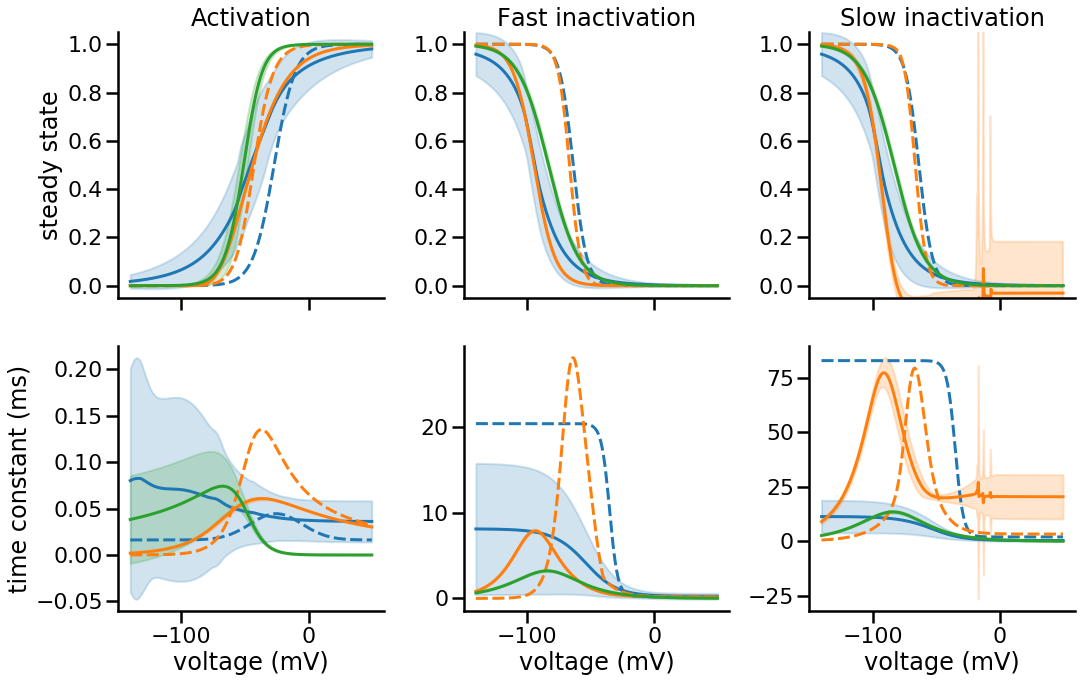

In [23]:
sns.set_context('poster')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_vars, cou_vars, std_vars], 
                       [nyg, cou, std], 
                       [nyg_pars, cou_pars, std_pars],
                       original=[True,True,False],
                       figshape=(3,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Fast inactivation')
ax[0][2].set_title('Slow inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [24]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/compare_gates.pdf')

### Compare final pulse after pulse train

In [25]:
import myokit

In [26]:
nsteps = 100
period = 1000
tstep = 100
vhold = -140
vstep = -30

pulsetrain = myokit.pacing.steptrain([vstep,]*nsteps,
                                     vhold,
                                     period-tstep,
                                     tstep)

In [27]:
# nygren_ina_full has had tau values adjusted for temperature to 310K
models = [myokit.load_model(modelfile) for modelfile in ['models/nygren_ina_adj.mmt',
                                                         'models/courtemanche_ina.mmt',
                                                         'models/standardised_ina.mmt']]
for m in models:
    pace = m.get('membrane.V')
    if pace.binding() != 'pace':
        if pace.is_state():
            pace.demote()
        pace.set_rhs(0)
        pace.set_binding('pace')

In [28]:
sims = [myokit.Simulation(m, pulsetrain) for m in models]

In [29]:
df_nyg, w_nyg = h_nyg.get_distribution()
df_cou_m, w_cou_m = h_cou_m.get_distribution()
df_cou_h, w_cou_h = h_cou_h.get_distribution()
df_cou_j, w_cou_j = h_cou_j.get_distribution()
df_sta, w_sta = h_sta.get_distribution()

In [30]:
par_samples = [nyg_pars, cou_pars, std_pars]

In [31]:
import time

all_samples = pd.DataFrame({})
for i, s in enumerate(sims):
    s.reset()
    # store original
    if models[i].name() != 'STA':
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['ina.g','engine.time','membrane.V'],
                        log_interval=0.2)
        datalog = datalog.trim(9890, 9930, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['ina.g']/max(datalog['ina.g']),
              'sample': 0,
              'model': models[i].name(),
              'type': 'original'}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)
    
    # re-calibrated
    for j, par_sample in enumerate(par_samples[i]):
        s.reset()
        for p, v in par_sample.items():
            name = p
            value = v
            if p.startswith("log"):
                name = p[4:]
                value = 10**v
            s.set_constant(name, value)
            
        # Log run time for comparisons
        t0 = time.time()
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['ina.g','engine.time','membrane.V'],
                        log_interval=0.2)
        t1 = time.time()
        dt = t1-t0
        
        datalog = datalog.trim(9890, 9930, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['ina.g']/max(datalog['ina.g']),
              'sample': j,
              'model': models[i].name(),
              'type': 'recalibrated',
              'runtime': dt}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [102]:
recalibrated_df = all_samples[all_samples['type']=='recalibrated']

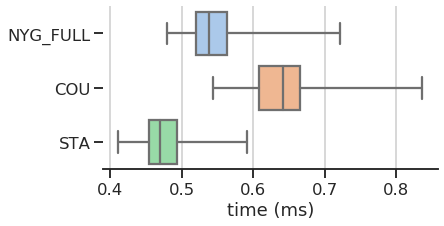

In [103]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 3))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='runtime', y='model', data=recalibrated_df,
            palette="pastel", whis="range")

# Add in points to show each observation
#sns.swarmplot(x='model', y='runtime', data=recalibrated_df,
#              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="time (ms)")
sns.despine(left=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = recalibrated_df['runtime'].max() + 0.01, 0.01, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p < 0.001", ha='center', va='bottom', color=col)

In [104]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/runtime_compare.pdf')

In [107]:
ss.mannwhitneyu(recalibrated_df[recalibrated_df.model=='STA'].runtime, 
                recalibrated_df[recalibrated_df.model=='COU'].runtime)

MannwhitneyuResult(statistic=760000.0, pvalue=0.0)

In [108]:
all_samples_detail = all_samples[(all_samples['time']>=9.8) & (all_samples['time'] < 12)]

Text(0.5, 1.0, '')

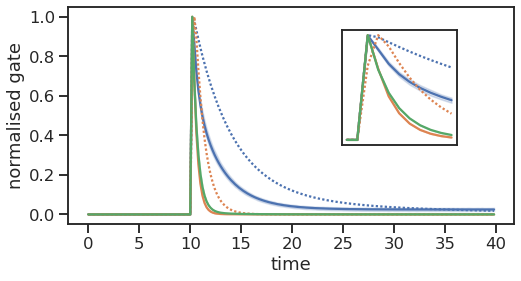

In [64]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(8,4))

g = sns.lineplot(x='time', y='gate', hue='model', style='type',
                 #kind='line', 
                 dashes = [(1,1),''],
                 data=all_samples, ax=ax,
                 legend=False)
                 #legend=False, height=5, aspect=1)

ax2 = plt.axes([.6, .4, .2, .4])
sns.lineplot(x='time',y='gate',hue='model',style='type',
             dashes=[(1,1),''],
             #data=all_samples_detail[all_samples_detail['type']=='original'], ax=ax2,
             data=all_samples_detail, ax=ax2,
             legend=False)
plt.setp(ax2, xticks=[], yticks=[])
ax2.set_xlabel('')
ax2.set_ylabel('')

#ax3 = plt.axes([.65, .25, .3, .15])
#sns.lineplot(x='time',y='gate',hue='model',
#             data=all_samples_detail[all_samples_detail['type']=='recalibrated'], ax=ax3,
#             legend=False)
#plt.setp(ax3, xticks=[], yticks=[])
#ax3.set_xlabel('')
#ax3.set_ylabel('')

#for a in g.axes.flatten():
ax.set_ylabel('normalised gate')
ax.set_title('')
#ax.axvline(x=9.8, linestyle='--', color='k', linewidth=2)
#ax.axvline(x=14, linestyle='--', color='k', linewidth=2)

In [65]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/trace_compare_out.pdf')

## Per-Experiment Comparison

In [28]:
N = 100

nyg_pars = df_nyg.sample(n=N, weights=w_nyg, replace=True)
nyg_pars = nyg_pars.set_index([pd.Index(range(N))])
nyg_pars = nyg_pars.to_dict(orient='records')

cou_pars_m = df_cou_m.sample(n=N, weights=w_cou_m, replace=True)
cou_pars_m = cou_pars_m.set_index([pd.Index(range(N))])
cou_pars_m = cou_pars_m.to_dict(orient='records')

cou_pars_h = df_cou_h.sample(n=N, weights=w_cou_h, replace=True)
cou_pars_h = cou_pars_h.set_index([pd.Index(range(N))])
cou_pars_h = cou_pars_h.to_dict(orient='records')

cou_pars_j = df_cou_j.sample(n=N, weights=w_cou_j, replace=True)
cou_pars_j = cou_pars_j.set_index([pd.Index(range(N))])
cou_pars_j = cou_pars_j.to_dict(orient='records')
#cou_pars = pd.concat([cou_pars_m,cou_pars_h,cou_pars_j],axis=1).to_dict(orient='records')

std_pars = df_sta.sample(n=N, weights=w_sta, replace=True)
std_pars = std_pars.set_index([pd.Index(range(N))])
std_pars = std_pars.to_dict(orient='records')

In [29]:
from ionchannelABC.experiment import setup
from ionchannelABC.distance import IonChannelDistance

In [30]:
from experiments.ina_sakakibara import (sakakibara_act,
                                        sakakibara_inact,
                                        sakakibara_inact_kin_fast,
                                        sakakibara_inact_kin_slow,
                                        sakakibara_rec_fast,
                                        sakakibara_rec_slow)
from experiments.ina_schneider import (schneider_taum)
experiments = [sakakibara_act, 
               schneider_taum, 
               sakakibara_inact, 
               sakakibara_inact_kin_fast,
               sakakibara_inact_kin_slow,
               sakakibara_rec_fast,
               sakakibara_rec_slow]
models = ['models/nygren_ina_adj.mmt',
          'models/courtemanche_ina.mmt',
          'models/standardised_ina.mmt']
pars = [nyg_pars, [cou_pars_m,cou_pars_h,cou_pars_j], std_pars]
names = ['N','C','S']

In [31]:
def experiment_dist(pars, modelfile, experiment):
    eps = []
    observ, model, sum_stats = setup(modelfile,
                                     experiment)
    obs = observ.to_dict()['y']
    obs = {str(k): v for k, v in obs.items()}
    dist = IonChannelDistance(exp_id=list(observ.exp_id),
                              variance=list(observ.variance),
                              delta=0.05)
    for sample in pars:
        eps.append(dist(sum_stats(model(sample)), obs, None))    
    return eps

In [46]:
df = pd.DataFrame({})
mask = [None, [0, 0, 1, 1, 2, 1, 2], None]
for j, exp in enumerate(experiments):
    df_ = pd.DataFrame({})
    for i, m in enumerate(models):
        if mask[i] is not None:
            eps = np.array(
                experiment_dist(pars[i][mask[i][j]],
                                m,
                                exp)
                )
        else:
            eps = np.array(
                experiment_dist(pars[i],
                                m,
                                exp)
                )
        df_ = df_.append(pd.DataFrame({'model': names[i],
                                       'exp': str(j),
                                       'eps': eps[~np.isinf(eps)]}))
    eps_max = df_['eps'].max()
    eps_min = df_['eps'].min()
    df_['eps'] = (df_['eps'] - eps_min)/(eps_max-eps_min)
    df = df.append(df_)

Text(0, 0.5, 'normalised residual')

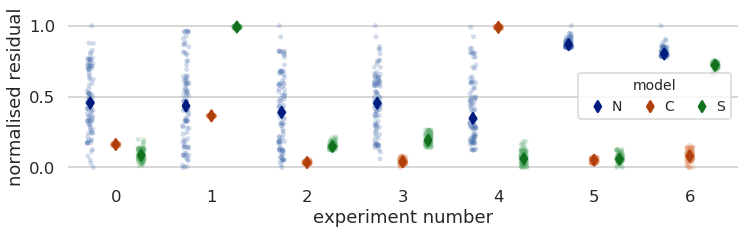

In [104]:
sns.set_context('talk')
sns.set_style('whitegrid')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(figsize=(12, 3))
sns.despine(bottom=True, left=True)

sns.stripplot(x='exp', y='eps', hue='model', data=df, 
            dodge=True, jitter=True, alpha=.25, zorder=1,
              palette='deep', ax=ax)

sns.pointplot(x="exp", y="eps", hue="model",
              data=df,
              estimator=np.median,
              dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="model",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=3, frameon=True)
ax.set_xlabel('experiment number')
ax.set_ylabel('normalised residual')

In [105]:
fig.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ina/per-exp-dist.pdf')